# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

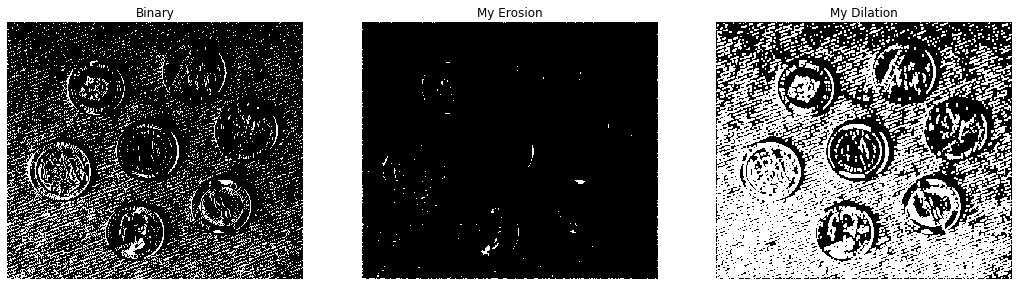

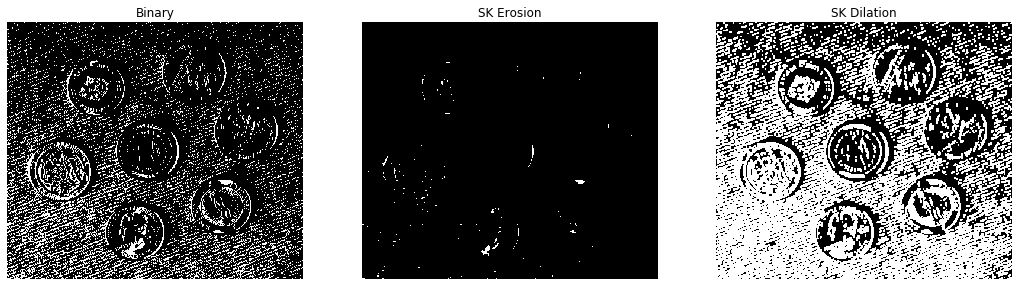

In [76]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

coins = rgb2gray(io.imread("img/coins.jpg"))

binary = np.copy(coins)

binary[binary >= 0.7 ] = 1
binary[binary < 0.7 ] = 0

def my_erosion(img, mask):
    shape = img.shape
    new_img = np.copy(img)
    out = int(np.floor(len(mask)/2))
    for i in range(out, shape[0]-out):
        for j in range(out, shape[1]-out):
            portion = img[i-out:i+out+1, j-out:j+out+1]
            mat = np.multiply(mask, portion)
            new_img[i, j] = np.min(mat)
    return new_img

def my_dilation(img, mask):
    shape = img.shape
    new_img = np.copy(img)
    out = int(np.floor(len(mask)/2))
    for i in range(out, shape[0]-out):
        for j in range(out, shape[1]-out):
            portion = img[i-out:i+out+1, j-out:j+out+1]
            mat = np.multiply(mask, portion)
            new_img[i, j] = np.max(mat)
    return new_img

my_mask = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

out_erosion = my_erosion(binary, my_mask)
out_dilation = my_dilation(binary, my_mask)


show_images([binary, out_erosion, out_dilation], ["Binary", "My Erosion", "My Dilation"])

sk_erosion = binary_erosion(binary, my_mask)
sk_dilation = binary_dilation(binary, my_mask)

show_images([binary, sk_erosion, sk_dilation], ["Binary", "SK Erosion", "SK Dilation"])


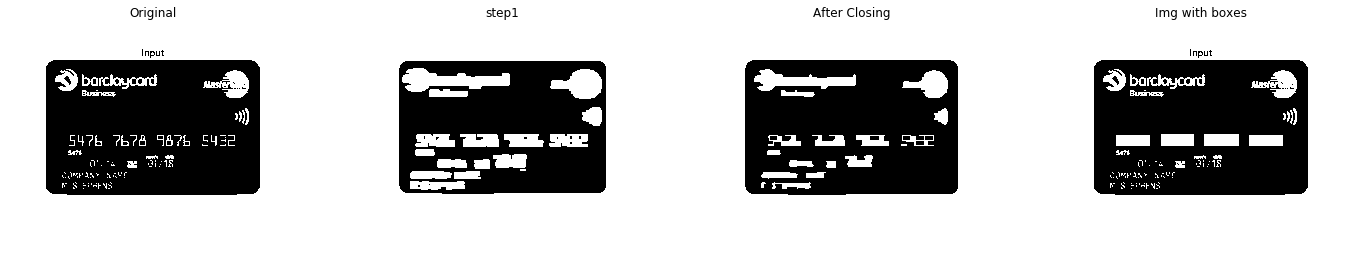

In [77]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.8 & 3.2)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
thres = 0.55
cards = rgb2gray(io.imread("img/card.jpg"))
cards[cards >= thres] = 1
cards[cards < thres] = 0

my_mask = np.array([
    [1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1],
    #[1,1,1,1,1,1,1,1,1,1],
])

final_closing = cards
for i in range(10):
    step1 = binary_dilation(final_closing, my_mask)
    final_closing = binary_erosion(step1, my_mask)

bounding_boxes = find_contours(final_closing, 0.8)

img_with_boxes = np.copy(cards)
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    #[Xmin, Xmax, Ymin, Ymax] = box
    Ymin = int(np.min(box[:,0]))
    Ymax = int(np.max(box[:,0]))
    Xmin = int(np.min(box[:,1]))
    Xmax = int(np.max(box[:,1]))
    width = Xmax - Xmin
    height = Ymax - Ymin
    #print(Xmin, Xmax, Ymin, Ymax)
    if width/height > 2.8 and width/height < 3.2:
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=cards.shape)
        img_with_boxes[rr, cc] = 1 #set color white

show_images([cards, step1, final_closing, img_with_boxes], ["Original","step1", "After Closing", "Img with boxes"])



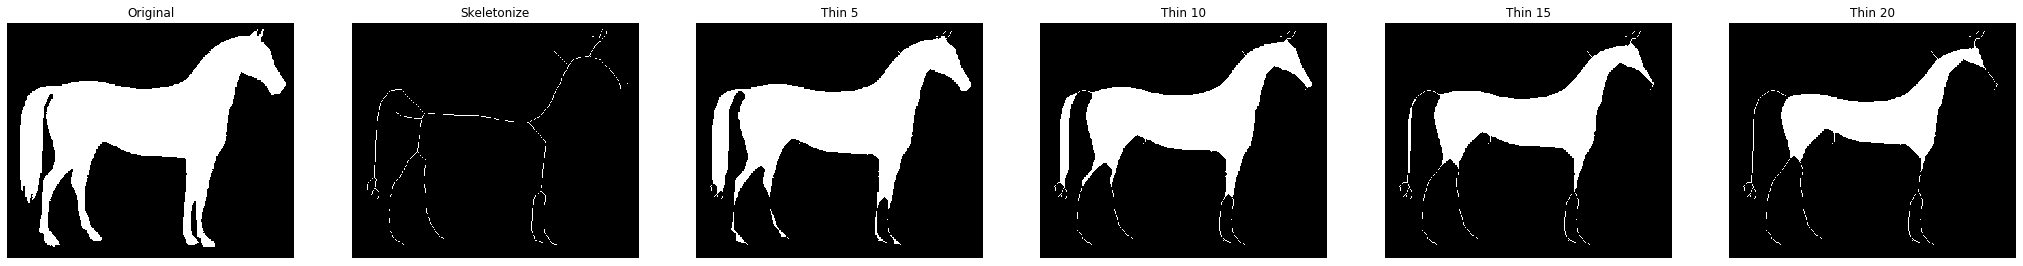

In [33]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

horse = rgb2gray(io.imread("img/horse.jpg"))

horse[horse >= 0.9] = 1
horse[horse < 0.9] = 0



sk_sk = skeletonize(horse)
sk_thin_5 = thin(horse, 5)
sk_thin_10 = thin(horse, 10)
sk_thin_15 = thin(horse, 15)
sk_thin_20 = thin(horse, 20)


show_images([horse, sk_sk, sk_thin_5, sk_thin_10, sk_thin_15, sk_thin_20], 
            ["Original", "Skeletonize", "Thin 5", "Thin 10", "Thin 15", "Thin 20"])
